# Facial Keypoints Detection

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data Loading

In [2]:
from fastai.vision import *

In [3]:
path = Config.data_path()/'facial-keypoints-detection'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection')

In [4]:
#! pip install kaggle --upgrade

In [5]:
#! rm {path}/*

#! kaggle competitions download -c facial-keypoints-detection -p {path}

#! unzip -q -n {path}/facial-keypoints-detection.zip -d {path}
#! unzip -q -n {path}/training.zip -d {path}
#! unzip -q -n {path}/test.zip -d {path}
#! rm {path}/*.zip

path.ls()

[PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/SampleSubmission.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/IdLookupTable.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/train'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/test'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/training.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/ein-test.png')]

# Anderer Ansatz (obsolet)

In [6]:
#df = pd.read_csv(path/'training.csv', header='infer')
#df.head()

In [7]:
#images = df['Image'].str.split(' ')

In [8]:
#px = 255-np.array(df.Image[0].split(),dtype=int)
#cpx = list(px.reshape(96,96))
#img = Image(Tensor([cpx,cpx,cpx]))
#img.save(path/'ein-test.png')

In [9]:
#images

In [10]:
#images_df = pd.DataFrame(images.values.tolist(), index= images.index)
#images_df.head()

# Neuer Ansatz

In [11]:
id_lookup = pd.read_csv(path/'IdLookupTable.csv')
train_csv = pd.read_csv(path/'training.csv')
test_csv = pd.read_csv(path/'test.csv')

In [12]:
train_csv.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


## Missing values

In [13]:
# Most labels are not always present
train_csv.isnull().sum(axis = 0)

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [14]:
# But all labels need to be predicted. Not always, but sometimes
pd.Series(id_lookup.FeatureName).value_counts()

nose_tip_y                   1783
nose_tip_x                   1783
left_eye_center_y            1782
right_eye_center_x           1782
right_eye_center_y           1782
left_eye_center_x            1782
mouth_center_bottom_lip_x    1778
mouth_center_bottom_lip_y    1778
mouth_left_corner_y           590
mouth_left_corner_x           590
mouth_center_top_lip_y        590
mouth_center_top_lip_x        590
left_eye_outer_corner_x       589
right_eye_inner_corner_x      589
right_eye_inner_corner_y      589
left_eye_outer_corner_y       589
left_eye_inner_corner_x       588
right_eye_outer_corner_y      588
right_eye_outer_corner_x      588
left_eye_inner_corner_y       588
mouth_right_corner_x          587
mouth_right_corner_y          587
right_eyebrow_inner_end_x     585
right_eyebrow_inner_end_y     585
left_eyebrow_inner_end_y      585
left_eyebrow_inner_end_x      585
left_eyebrow_outer_end_y      574
left_eyebrow_outer_end_x      574
right_eyebrow_outer_end_y     572
right_eyebrow_

In [15]:
# We fill the missing labels with their respective mean (not ideal, but we need to do this)
for c in train_csv.columns:
    if(train_csv[c].dtype!='object'):
        train_csv[c]=train_csv[c].fillna(train_csv[c].median())

## Bilder generieren

In [16]:
train_path = path/'train'
test_path = path/'test'

train_path.mkdir(exist_ok=True)
test_path.mkdir(exist_ok=True)

In [17]:
def save_str_img(strimg,w,h,flpath):
    px=255-np.array(strimg.split(),dtype=int)
    if(len(px)==w*h and len(px)%w==0 and len(px)%h==0):
        cpx = list(px.reshape(w,h))
        img = Image(Tensor([cpx,cpx,cpx]))
        img.save(flpath)
        return img
    else:
        raise Exception("Invalid height and width")

def save_all_str_imgs(csv,dest_folder_path):
    for index, row in csv.iterrows():
        save_str_img(row.Image,96,96,dest_folder_path/(str(index)+'.jpg'))

In [18]:
#save_all_str_imgs(train_csv, train_path)
#save_all_str_imgs(test_csv, test_path)

In [19]:
def get_locs(flname):
    index = int(flname.name[:-4]) # remove '.jpg'
    plist=[]
    coords=list(train_csv.drop(columns=['Image']).loc[index])
    for i in range(len(coords)//2):
        plist.append([coords[i*2+1],coords[i*2]])
    return tensor(plist)
#     return tensor([coords[1],coords[0]])

In [20]:
#empty_labels = np.zeros((len(test_csv.Image), 15, 2))
#empty_labels.shape

In [21]:
data = (PointsItemList
        .from_folder(train_path)
        .split_by_rand_pct(0.05, seed=42)
        .label_from_func(get_locs)
        .add_test_folder(test_path)#, label=empty_labels)
        .transform([], size=(96,96))
        .databunch(bs=64)
       )

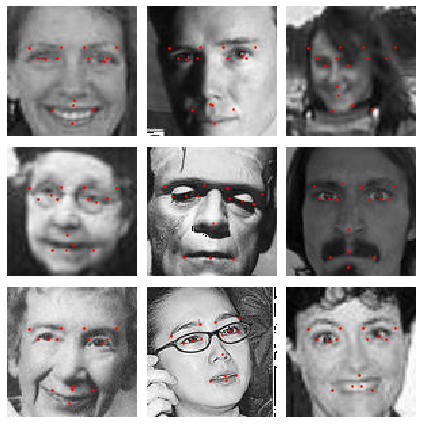

In [22]:
data.show_batch(3,figsize=(6,6))

# Training

In [23]:
# calculates distance between true and predictions
def mloss(y_true, y_pred):
    y_true=y_true.view(-1,15,2)
    
    y_true[:,:,0]=y_true[:,:,0].clone()-y_pred[:,:,0]
    y_true[:,:,1]=y_true[:,:,1].clone()-y_pred[:,:,1]
    
    y_true[:,:,0]=y_true[:,:,0].clone()**2
    y_true[:,:,1]=y_true[:,:,1].clone()**2
    
    return y_true.sum(dim=2).sum(dim=1).sum()

In [24]:
learn = cnn_learner(data,models.resnet34,loss_func=MSELossFlat(),metrics=root_mean_squared_error)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 2.51E-02


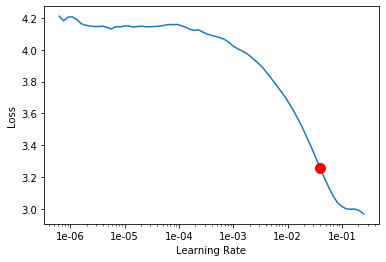

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
lr = 3.98e-2
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.635543,0.034799,0.186226,00:04
1,0.167766,0.040286,0.199895,00:04
2,0.025840,0.003052,0.054795,00:04
3,0.006202,0.003048,0.054716,00:04
4,0.003656,0.002920,0.053549,00:04
5,0.003146,0.002863,0.052955,00:04
6,0.002963,0.002765,0.051993,00:04
7,0.002875,0.002737,0.051730,00:04


In [32]:
learn.save('rn34-stage1')

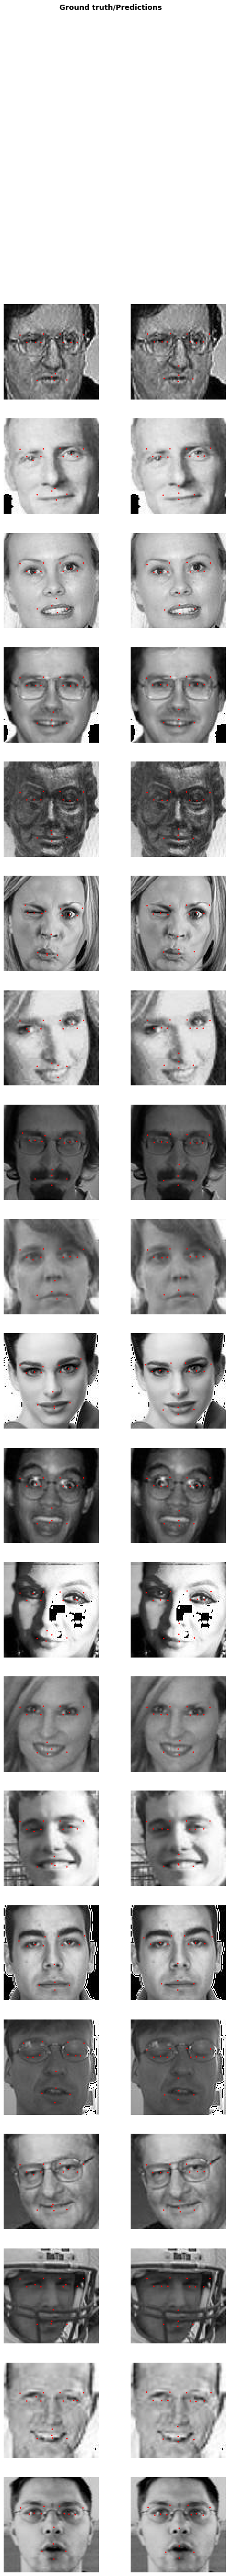

In [33]:
learn.show_results(ds_type=DatasetType.Valid, rows=20)

## Test

In [25]:
learn.load('rn34-stage1')

Learner(data=ImageDataBunch;

Train: LabelList (6697 items)
x: PointsItemList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: PointsLabelList
ImagePoints (96, 96),ImagePoints (96, 96),ImagePoints (96, 96),ImagePoints (96, 96),ImagePoints (96, 96)
Path: /home/jupyter/.fastai/data/facial-keypoints-detection/train;

Valid: LabelList (352 items)
x: PointsItemList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: PointsLabelList
ImagePoints (96, 96),ImagePoints (96, 96),ImagePoints (96, 96),ImagePoints (96, 96),ImagePoints (96, 96)
Path: /home/jupyter/.fastai/data/facial-keypoints-detection/train;

Test: LabelList (1783 items)
x: PointsItemList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/facial-keypoints-detection/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stri

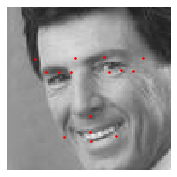

In [26]:
test_img = open_image(path/'test/1600.jpg')
pred = learn.predict(test_img)
test_img.show(y=pred[0])

In [27]:
pred_test = learn.get_preds(ds_type=DatasetType.Test)

In [28]:
test_csv.count()

ImageId    1783
Image      1783
dtype: int64

In [29]:
pred_columns = list(train_csv.columns.values)
pred_columns.remove('Image')
pred_test_df = pd.DataFrame(index=range(test_csv.count()[0]), columns=pred_columns)

for i in range(test_csv.count()[0]):
    pred_test_df.iloc[i] = pred_test[0][i].numpy()

pred_test_df['ImageId'] = test_csv.ImageId

pred_test_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,ImageId
0,-0.21534,0.376721,-0.19829,-0.396831,-0.203502,0.23849,-0.204848,0.520305,-0.191974,-0.247014,...,-0.00929765,0.582676,0.33298,0.601674,-0.311431,0.460018,-0.000375313,0.736636,0.00091758,1
1,-0.233105,0.398352,-0.208841,-0.380269,-0.211724,0.236785,-0.217768,0.52588,-0.215625,-0.239017,...,0.0175161,0.579415,0.311514,0.581135,-0.315683,0.532053,-0.00723741,0.652694,0.0275471,2
2,-0.233086,0.376653,-0.228855,-0.393455,-0.210367,0.211105,-0.217599,0.545474,-0.206134,-0.230042,...,-0.0116291,0.596922,0.325361,0.597306,-0.344588,0.545026,-0.0130701,0.708164,-0.00303531,3
3,-0.236438,0.393798,-0.213105,-0.387627,-0.207268,0.222485,-0.224199,0.53949,-0.199898,-0.2285,...,0.00791451,0.574338,0.341528,0.587321,-0.316546,0.535385,0.00757185,0.675901,0.0249485,4
4,-0.202495,0.376725,-0.195289,-0.372318,-0.207589,0.228635,-0.219451,0.52668,-0.203477,-0.232948,...,-0.00702309,0.572275,0.321553,0.581857,-0.317315,0.517987,-0.00240302,0.611739,0.00176694,5


In [111]:
sub = pd.DataFrame(columns=['RowId','Location'])
for index,row in id_lookup.iterrows():
    fname = row.FeatureName
    trow=pred_test_df.loc[pred_test_df['ImageId']==row.ImageId]
    sub.loc[index]=[row.RowId,trow.iloc[0][fname]]

In [112]:
sub.head()

,RowId,Location
0,1.0,-0.215340
1,2.0,0.376721
2,3.0,-0.198290
3,4.0,-0.396831
4,5.0,-0.203502


# TODO: Denormalize

Die Daten sind offensichtlich noch normalisiert und damit nicht im richtigen Format: TODO Fixen

In [35]:
pred_test[0][0]

tensor([-2.1534e-01,  3.7672e-01, -1.9829e-01, -3.9683e-01, -2.0350e-01,
         2.3849e-01, -2.0485e-01,  5.2030e-01, -1.9197e-01, -2.4701e-01,
        -1.8230e-01, -5.3491e-01, -4.1397e-01,  1.7121e-01, -3.8358e-01,
         6.5453e-01, -4.0277e-01, -2.0247e-01, -3.4309e-01, -6.8334e-01,
         1.7376e-01, -9.2977e-03,  5.8268e-01,  3.3298e-01,  6.0167e-01,
        -3.1143e-01,  4.6002e-01, -3.7531e-04,  7.3664e-01,  9.1758e-04])

In [42]:
pred_test[0][1]

tensor([-0.2331,  0.3984, -0.2088, -0.3803, -0.2117,  0.2368, -0.2178,  0.5259,
        -0.2156, -0.2390, -0.2171, -0.5298, -0.3835,  0.1753, -0.3842,  0.6548,
        -0.3819, -0.1894, -0.3798, -0.6696,  0.3810,  0.0175,  0.5794,  0.3115,
         0.5811, -0.3157,  0.5321, -0.0072,  0.6527,  0.0275])

In [80]:
data.batch_stats()

[tensor([0.5116, 0.5116, 0.5116]), tensor([0.2295, 0.2295, 0.2295])]

In [45]:
doc(data.normalize)

In [48]:
denormalize(pred_test[0], data.batch_stats()[0], data.batch_stats()[0])

tensor([[[0.3871, 0.6752, 0.3954,  ..., 0.4917, 0.8503, 0.4923],
         [0.3785, 0.6857, 0.3903,  ..., 0.4883, 0.8094, 0.5053],
         [0.3785, 0.6751, 0.3805,  ..., 0.4855, 0.8364, 0.4904],
         ...,
         [0.3808, 0.6808, 0.3849,  ..., 0.4872, 0.8447, 0.4905],
         [0.3829, 0.6906, 0.3925,  ..., 0.4910, 0.7967, 0.5080],
         [0.3860, 0.6832, 0.3918,  ..., 0.4903, 0.8052, 0.5038]],

        [[0.3871, 0.6752, 0.3954,  ..., 0.4917, 0.8503, 0.4923],
         [0.3785, 0.6857, 0.3903,  ..., 0.4883, 0.8094, 0.5053],
         [0.3785, 0.6751, 0.3805,  ..., 0.4855, 0.8364, 0.4904],
         ...,
         [0.3808, 0.6808, 0.3849,  ..., 0.4872, 0.8447, 0.4905],
         [0.3829, 0.6906, 0.3925,  ..., 0.4910, 0.7967, 0.5080],
         [0.3860, 0.6832, 0.3918,  ..., 0.4903, 0.8052, 0.5038]],

        [[0.3871, 0.6752, 0.3954,  ..., 0.4917, 0.8503, 0.4923],
         [0.3785, 0.6857, 0.3903,  ..., 0.4883, 0.8094, 0.5053],
         [0.3785, 0.6751, 0.3805,  ..., 0.4855, 0.8364, 0.

In [57]:
train_csv.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.359218,37.651059,30.306001,37.976641,59.257811,37.899533,73.274406,37.660882,36.651898,37.958820,...,48.374186,62.715884,63.212873,75.840500,32.955930,76.058293,47.928057,72.706601,48.569592,78.968864
std,3.445790,3.150692,3.080386,3.030830,1.528334,1.309824,1.931566,1.634136,1.332939,1.311357,...,4.280038,5.720567,2.314468,2.599481,2.249786,2.508036,1.887842,2.970112,4.259953,5.395201
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.084235,35.906648,28.788000,36.329459,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,46.602370,59.292697,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,46.584000,75.567671
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024349,39.254400,31.767416,39.562527,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,50.330437,66.492686,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,50.662249,82.222604
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


# Achtung!

Schon die Daten data haben scheinbar "normalisierte" Labels (macht das bei Labels überhaupt Sinn?)

In [66]:
data.train_ds[0][1].data

tensor([[-0.2562,  0.4197],
        [-0.1627, -0.3789],
        [-0.2109,  0.2355],
        [-0.2159,  0.5260],
        [-0.2095, -0.2364],
        [-0.2111, -0.5305],
        [-0.3848,  0.1718],
        [-0.3797,  0.6622],
        [-0.3840, -0.1813],
        [-0.3683, -0.6711],
        [ 0.2536,  0.0204],
        [ 0.5787,  0.3162],
        [ 0.5833, -0.3129],
        [ 0.5126, -0.0020],
        [ 0.5595,  0.0799]])

In [69]:
train_csv.iloc[0]

left_eye_center_x                                                      66.0336
left_eye_center_y                                                      39.0023
right_eye_center_x                                                      30.227
right_eye_center_y                                                     36.4217
left_eye_inner_corner_x                                                59.5821
left_eye_inner_corner_y                                                39.6474
left_eye_outer_corner_x                                                73.1303
left_eye_outer_corner_y                                                  39.97
right_eye_inner_corner_x                                               36.3566
right_eye_inner_corner_y                                               37.3894
right_eye_outer_corner_x                                               23.4529
right_eye_outer_corner_y                                               37.3894
left_eyebrow_inner_end_x                            

## Hmm

Die Funktion, die fürs Labeln genutzt wird, funktioniert aber eigentlich:

In [87]:
get_locs(path/'train/1.jpg')

tensor([[34.9701, 64.3329],
        [33.4487, 29.9493],
        [35.2743, 58.8562],
        [36.1872, 70.7227],
        [34.3615, 36.0347],
        [33.1444, 24.4725],
        [28.2759, 53.9874],
        [30.4059, 78.6342],
        [26.1460, 42.7289],
        [27.0589, 16.8654],
        [55.6609, 48.2063],
        [76.3520, 56.4214],
        [76.0477, 35.1224],
        [70.2666, 46.6846],
        [85.4802, 45.4679]])

`data.train_ds[0][1].data` und `get_locs(path/'train/1.jpg')` sehen zwar ganz unterschiedlich aus, sind aber einheitlich voneinander transformiert. Das sieht man daran, dass ähnliche Zahlenwerte in dem einen im anderen auch nahe beieinander sind

In [100]:
get_locs(path/'train/1.jpg').mean(dim=0), get_locs(path/'train/1.jpg').std(dim=0)

(tensor([45.5387, 47.2324]), tensor([20.9818, 17.1777]))

In [91]:
get_locs(path/'train/1.jpg').mean(), get_locs(path/'train/1.jpg').std()

(tensor(46.3856), tensor(18.8605))

In [98]:
normalize(get_locs(path/'train/1.jpg'), get_locs(path/'train/1.jpg').mean(), get_locs(path/'train/1.jpg').std())

tensor([[-0.6053,  0.9516],
        [-0.6859, -0.8715],
        [-0.5891,  0.6612],
        [-0.5407,  1.2904],
        [-0.6375, -0.5488],
        [-0.7021, -1.1618],
        [-0.9602,  0.4031],
        [-0.8473,  1.7098],
        [-1.0731, -0.1939],
        [-1.0247, -1.5652],
        [ 0.4918,  0.0965],
        [ 1.5888,  0.5321],
        [ 1.5727, -0.5972],
        [ 1.2662,  0.0159],
        [ 2.0728, -0.0487]])